# 演習の回答例 

## SASの画面構成

前のサンプルプログラムとCharm City Circulator Ridershipデータセットを使用し、以下の変更を加えてSASの動作を試してみてください。

1. 属性マップデータセット `palette` を使用して、元の色とは異なる色に変更してください。SASの色のリストは https://support.sas.com/content/dam/SAS/support/en/books/pro-template-made-easy-a-guide-for-sas-users/62007_Appendix.pdf を参照してください。
2. 表示する曜日を変更し、`"Saturday"`ではなく`"Sunday"`を表示するようにしてください。
3. `proc sgpanel` で `series` を `scatter` に変更して、線グラフから散布図に変更してください。


<!-- # Solutions to Exercises 

## SAS Windowing Environment 

Use the sample SAS program code provided above and the Charm City Circulator Ridership dataset to experiment with using SAS by making the following changes to the provided code. 

1\. Go through and change the colors using the attribute map dataset `palette` to something other than what they originally were. See https://support.sas.com/content/dam/SAS/support/en/books/pro-template-made-easy-a-guide-for-sas-users/62007_Appendix.pdf for a large list of colors in SAS. 
2\. Change the days you are keeping to show `"Sunday"` instead of "`Saturday"`. 
3\. Change the plot from a line plot to a scatterplot by changing `series` to `scatter` in `proc sgpanel`. 
-->


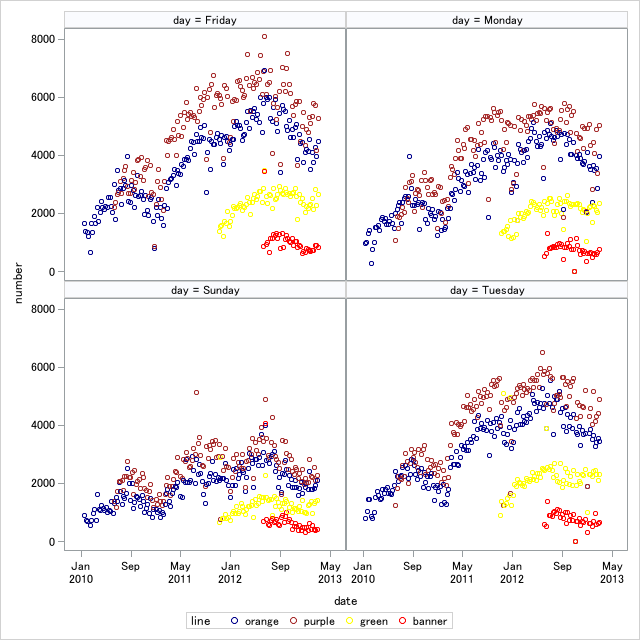

In [1]:
%let working_directory = data; *Replace data with your path to your 
                                directory containing the dataset;

proc import datafile = "&working_directory/Charm_City_Circulator_Ridership.csv" 
  out = circ dbms = csv replace;
  getnames = yes;
  guessingrows = max;
run;

proc sort data = circ;
  by day date daily;
run;

proc transpose data = circ out = long (rename=(_NAME_ = var col1 = number));
  var orangeboardings -- banneraverage;
  by day date daily;
run;

data long2;
  set long;
  var = tranwrd(var, 'Board', '_Board');
  var = tranwrd(var, 'Alight', '_Alight');
  var = tranwrd(var, 'Average', '_Average');
  line = scan(var, 1, '_');
  type = scan(var, 2, '_');
  drop var;
run;

data avg;
  set long2;
  where (type = "Average");
run;

data palette;
  input id $ value $ linecolor $;
  markercolor = linecolor;
  datalines;
lc banner red
lc green yellow
lc orange darkblue
lc purple brown
;
run;

proc sgpanel data = avg dattrmap=palette; 
  where day in ("Monday" "Tuesday" "Friday" "Sunday");
  panelby day;
  scatter Y = number X = date / group = line attrid = lc;
run;

## 基本的なSASプログラム

1. 以下のプログラムを実行してください。これは何を行うものでしょうか?

```
PROC PRINT DATA = sashelp.heart (OBS=10);
RUN;
PROC MEANS DATA = sashelp.heart;
  VAR height weight;
RUN;
```

<!-- 
## Basic SAS Programming 

1\. Submit the following simple SAS program. What does it do? 

``` 
PROC PRINT DATA = sashelp.heart (OBS=10); 
RUN; 

PROC MEANS DATA = sashelp.heart; 
VAR height weight; 
RUN; 
``` 
-->

In [2]:
proc print data = sashelp.heart (obs=10);
run;

proc means data = sashelp.heart;
  var height weight;
run;

このプログラムはデータセットsashelp.heartの先頭10行と、変数「Height」と 「Weight」の要約統計量 N (サンプルサイズ), 平均, 標準偏差, 最小値, 最大値を出力します。  

2. 以下のプログラムを実行してください。いくつのDATAステップ、PROCステップが含まれ、どのステップが実行されるでしょうか?
```
data work.quant;
  set sashelp.heart; /* Read in from the heart datset */
  keep height weight diastolic systolic; *Only keep these variable 
                                      in the new dataset;
RUN;
proc print data = work.quant (obs=10);
run;
/*
proc means data = work.quant min q1 median q3 max mean std;
run;
*/
```

<!-- 
This program prints out the first 10 rows of the sashelp.heart dataset and the summary statistics N (sample size), mean, standard deviation, minimum and maxium for the Height and Weight variables. 

2\. Submit the following small program. How many DATA steps are there? How man PROC steps? Which steps are executed? 

``` 
DATA work.quant; 
SET sashelp.heart; /* Read in from the heart datset */ 
KEEP height weight diastolic systolic; *Only keep these variable 
in the new dataset; 
RUN; 

PROC PRINT DATA = work.quant (OBS=10); 
RUN; 

/* 
PROC MEANS DATA = work.quant MIN Q1 Median Q3 MAX MEAN STD; 
RUN; 
*/ 
``` 
-->

In [3]:
data work.quant;
  set sashelp.heart; /* Read in from the heart datset */
  keep height weight diastolic systolic; *Only keep these variable 
                                       in the new dataset;
run;

proc print data = work.quant (obs=10);
run;

/*
proc means data = work.quant min q1 median q3 max mean std;
run;
*/

データステップは1つ、PROCステップは2つあります。しかし最後のPROC MEANSはコメントアウトされているため実行されません。

3. データセット sashelp.heart でPROC CONTENTSを実行してください。データセットのオブザベーション数はいくつですか?
<!-- 
There is one DATA step and there are two PROC steps; however, the last PROC MEANS is not run since it is within a paragraph comment. 

3\. Run PROC CONTENTS on the dataset sashelp.heart. How many observations are in this datset? 
-->

In [4]:
proc contents data = sashelp.heart;
run;

データセットには5209オブザベーション(行)があります。

4. 以下のプログラムを実行してください。「CurrentDate」の値は何でしたか? (この値はSASが基準日とする1960/1/1からの経過日数です)

```
data work.date;
  CurrentDate = Today();
run;
   
proc print data = work.date;
run;
```
<!-- 
There are 5209 observations (rows) in the dataset. 

4\. Submit the following program to SAS. What is the value of CurrentDate? (This value represents the number of days since Januar 1, 1960, the reference date for the SAS system). 

``` 
DATA work.date; 
CurrentDate = Today(); 
RUN; 

PROC PRINT DATA = work.date; 
RUN; 
``` 
-->

In [5]:
data work.date;
  CurrentDate = Today();
run;
   
proc print data = work.date;
run;

proc print data = work.date;
  format currentdate mmddyy10.;
run;

「CurrentDate」の値はプログラムを実行した日によります。私は2024/06/06に実行したので値は23533で、1960/1/1から23533日です。

## データの入出力

1. PROC IMPORT を使用して、Youth_Tobacco_Survey_YTS_Data.csv を読み込み、それに youth という名前を付けます。

<!-- 
The value of current date will change depending on when you submit this program. I submitted this program in 10/17/2020 and received the value 22205 or 22205 days since January 1, 1960. 

## Data I/O 

1\. Use PROC IMPORT to read in the Youth Tobacco study, Youth_Tobacco_Survey_YTS_Data.csv and name it youth. 
-->

In [1]:
proc import datafile = "/folders/myfolders/SAS_Notes/data/Youth_Tobacco_Survey_YTS_Data.csv"
            out = youth dbms = csv replace;
  getnames = yes;
  guessingrows = 500;
run;

proc print data = youth (obs=5);
run;

2. READMEに記載のリンクからMonumentsデータセット、Monuments.xlsxをダウンロードします。PROC IMPORTを使ってデータセットを読み込み、monという名前で出力します。

<!-- 
2\. Download an Excel version of the Monuments dataset, Monuments.xlsx, from CANVAS. Use PROC IMPORT to read in the dataset and call the output mon.
 -->

In [2]:
proc import datafile = "/folders/myfolders/SAS_Notes/data/Monuments.xlsx"
            out = mon dbms = xlsx replace;
  getnames = yes;
run;

proc print data = mon (obs=5);
run;

3. DATALINESを使って以下の列フォーマットデータを読み込み、PROC PRINTを使って結果を出力するDATAステップを書きます。このデータセットには、フランスのIlle-et-Vilaineにおける食道癌の情報が含まれています。変数は

    * 年齢層
    * アルコール消費量
    * タバコ消費量
    * 症例数
    * コントロール数

データを読み込むためにDATAステップを書いて結果を表示させます。注意: 最初の行は列を数えるためのものです。各数値に5をかけたものが列番号になります。
``` 
----1----2----3----4----5----6----7----8
75+ 0-39g/day 0-9g/day      1        18
75+ 0-39g/day    10-19      2         6
75+ 0-39g/day      30+      1         3
75+     40-79 0-9g/day      2         5
75+     40-79    10-19      1         3
75+     40-79    20-29      0         3
75+     40-79      30+      1         1
75+    80-119 0-9g/day      1         1
75+    80-119    10-19      1         1
75+      120+ 0-9g/day      2         2
75+      120+    10-19      1         1
```

<!-- 
3\. Write a DATA step that will read in the following column formatted data using DATALINES and print the results using PROC PRINT. This dataset contains information on esophageal cancer in Ille-et-Vilaine, France. The variables are 

* Age group 
* Alcohol consumption 
* Tobacco consumption 
* Number of Cases 
* Number of Controls 

Write a DATA step to read in the data and print the results. Note: the first line is to help you count the columns. Each number corresponds to a multiple of 5. 


    
    
    
----1----2----3----4----5----6----7----8
    
75+ 0-39g/day 0-9g/day      1        18
    
75+ 0-39g/day    10-19      2         6
    
75+ 0-39g/day      30+      1         3
    
75+     40-79 0-9g/day      2         5
    
75+     40-79    10-19      1         3
    
75+     40-79    20-29      0         3
    
75+     40-79      30+      1         1
    
75+    80-119 0-9g/day      1         1
    
75+    80-119    10-19      1         1
    
75+      120+ 0-9g/day      2         2
    
75+      120+    10-19      1         1
    
 -->

In [3]:
data eso;
  input aggrp $ 1-3 alc $ 5-13 smoke $ 15-22 ncases 29 ncontrl 38-39;
  datalines;
75+ 0-39g/day 0-9g/day      1        18
75+ 0-39g/day    10-19      2         6
75+ 0-39g/day      30+      1         3
75+     40-79 0-9g/day      2         5
75+     40-79    10-19      1         3
75+     40-79    20-29      0         3
75+     40-79      30+      1         1
75+    80-119 0-9g/day      1         1
75+    80-119    10-19      1         1
75+      120+ 0-9g/day      2         2
75+      120+    10-19      1         1
;
run;

proc print data=eso;
run;

## SAS変数と代入ステートメント

1. 次のSASデータステップを使って、新しい変数「Grade」と「Course」を以下の定義に従って作成してください。

```
data school; 
   input Age Quiz : $1. Midterm Final;
   /* ここにステートメントを追加 */
datalines;
12 A 92 95  
12 B 88 88
13 C 78 75
13 A 92 93
12 F 55 62
13 B 88 82
;
```

If-Then-Elseステートメントを使って新しい2つの変数を作成してください。

* Grade(数値)の値は、Ageが12の場合は6、Ageが13の場合は8となります。
* クイズの成績には以下の数値が対応しています: A=95、B=85、C=75、D=70、F=65  
  この情報を使って、コースの成績「Course」(クイズ「Quiz」20%、中間試験「Midterm」30%、期末試験「Final」50%の加重平均)を計算してください。



<!-- 
## SAS Variables and Assignment Statements 

1\. Use the following SAS data step to create the new variables `Grade` and `Course` defined below: 


    
    
    
data school;
    
   input Age Quiz : $1. Midterm Final;
    
   /* Add you statements here */
    
datalines;
    
12 A 92 95
    
12 B 88 88
    
13 C 78 75
    
13 A 92 93
    
12 F 55 62
    
13 B 88 82
    
;
    


Using If-Then-Else statements, compute two new variables as follows: 

* Grade (numeric), with a value of 6 if Age is 12 and a value of 8 if Age is 13. 
* The quiz grades have numerical equivalents as follows: A = 95, B = 85, C = 75, D = 70, and F = 65. Using this information, compute a course grade (Course) as a weighted average of the Quiz (20\%), Midterm (30\%) and Final (50\%).
 -->

In [4]:
data school;
  input Age Quiz : $1. Midterm Final;
  if Age = 12 then Grade = 6;
  else if AGE = 13 then Grade = 8;
  if quiz = "A" theN Course = 0.2*95 + 0.3*midterm + 0.5*final;
  else if quiz = "B" then Course = 0.2*85 + 0.3*midterm + 0.5*final;
  else if quiz = "C" then Course = 0.2*75 + 0.3*midterm + 0.5*final;
  else if quiz = "D" then Course = 0.2*70 + 0.3*midterm + 0.5*final;
  else if quiz = "F" then Course = 0.2*65 + 0.3*midterm + 0.5*final;
  datalines;
12 A 92 95
12 B 88 88
13 C 78 75
13 A 92 93
12 F 55 62
13 B 88 82
;
run;

proc print data = school;
run;

## データの操作

1. データセットsashelp.heartから一時SASデータセット`heart`を作成してください。(ライブラリsashelpは、SASに同梱された永久ライブラリです)

<!-- ## Working with Your Data 

1\. Create a temporary SAS dataset called `heart` from the sashelp.heart dataset. The library sashelp if a permanent library that comes with SAS.
-->


In [5]:
data heart;
  set sashelp.heart;
run;


13                                                        SAS システム               2024年 6月 6日 木曜日 09時33分00秒

223        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
223      ! ods graphics on / outputfmt=png;
224        
225        options notes ;
226        data heart;
227          set sashelp.heart;
228        run;

NOTE: データセットSASHELP.HEARTから5209オブザベーションを読み込みました。
NOTE: データセットWORK.HEARTは5209オブザベーション、17変数です。
NOTE: DATA ステートメント処理(合計処理時間):
      処理時間           0.00 秒
      ユーザーCPU時間    0.00 秒
      システムCPU時間    0.00 秒
      メモリ             2185.21k
      OSメモリ           23724.00k
      タイムスタンプ     2024/06/06 午前09:35:26
      ステップ数                        10  スイッチ数  2
      ページフォルト回数                0
      ページリクレーム回数              259
      ページスワップ回数                0
      自発的コンテキストスイッチ回数    9
      非自発的コンテキストスイッチ回数  0
      ブロック入力操作回数              0
      ブロック出力操作回数              1800
      

229        
230        


2. PROC CONTENTSを実行してデータセット`heart`のディスクリプタ部を表示してください。このデータセットにはいくつのオブザベーション(行)と変数(列)がありますか?

<!-- 
2\. View the description of the `heart` dataset by running PROC CONTENTS. How many observations (rows) and variables (columns) are in the dataset? 
-->

In [6]:
proc contents data = heart;
run;

5209オブザベーション(行)と17変数(列)

3. データセットオプションのRENAME=オプションを使って、`Status`を`condition`に変更します。PROC CONTENTSの変数の一覧を表示して、名前が変更されたことを確認してください。
<!-- 
There are 5209 observations (rows) and 17 variables (columns). 

3\. Use the RENAME= option to rename `Status` to `condition`. Show the variables table from PROC CONTENTS to see that the name has changed. 
-->

In [7]:
data heart2 (rename = (status = condition));
  set heart;
run;

proc contents data = heart2;
run;

4. データセット`heart`からサブセット`heart_sub`を作成し、`height`、`weight`、`diastolic`の列のみを含めます。`heart_sub`のオブザベーション(行)と変数(列)はいくつですか?`heart_sub`の最初の5行を出力してください。 
<!-- 
4\. Create a subset of `heart` called `heart_sub` that contains only the columns `height`, `weight`, and `diastolic`. What are the dimensions of `heart_sub`? Print the first five rows of `heart_sub`. 
-->

In [8]:
data heart_sub;
  set heart;
  keep height weight diastolic;
run;

proc contents data = heart_sub;
run;

proc print data = heart_sub(obs=5);
run;

データセット`heart_sub` は5209行 3列

5. データセット`heart`から、拡張期血圧(diastolic)が90を超える被験者の行をデータセット`heart_sub2`にサブセットします。何オブザベーションありますか?`heart_sub2`の最初の5行を出力してください。
<!-- The new dataset `heart_sub` contains 5209 rows and 3 columns. 

5\. Subset the patients (rows) of `heart` that have a diastolic blood pressure (diastolic) more than 90 into a dataset called `heart_sub2`. How many are there? Print the first five rows of `heart_sub2`. 
-->

In [9]:
data heart_sub2;
  set heart;
  where diastolic > 90;
run;

proc contents data = heart_sub2;
run;

proc print data = heart_sub2(obs=5);
run;

拡張期血圧(diastolic)が90より高いオブザベーションは1366

6. データセット`heart`から、拡張期血圧が90以下で体重が180ポンド以上の被験者の行をデータセット`heart_sub3`にサブセットします。何オブザベーションありますか?`heart_sub3`の最初の5行を出力してください。

<!-- 
There are 1366 patients with a diastolic blood pressure above 90. 

6\. Subset the patients (rows) of `heart` that have a diastolic blood pressure less than or equal to 90 and have a weight more than 180 pounds into a dataset called `heart_sub3`. How many are there? Print the first five rows of `heart_sub3`. 
-->

In [10]:
data heart_sub3;
  set heart;
  where diastolic <= 90 and weight > 180;
run;

proc contents data = heart_sub3;
run;

proc print data = heart_sub3(obs=5);
run;

拡張期血圧が90以下で体重が180ポンド以上なのは481オブザベーション

7. データセット`heart`から重度の喫煙者(Smoking_Status = "Heavy (16-25)")について、`weight`、`systolic`、`cholesterol`の列のみを含むサブセットを作成します。このサブセットを`heart_sub`に保存します。このデータセットののオブザベーション(行)と変数(列)はいくつですか?`heart_sub`の最初の5行を出力してください。

<!-- 
There are 481 patients with a diastolic blood pressure less than or equal to 90 and with a weight above 180 pounds. 

7\. Create a subset of `heart` that only contains the columns `weight`, `systolic`, and `cholesterol` for those that are heavy smokers smoker (Smoking_Status = "Heavy (16-25)"). Save this to `heart_sub`. What are the dimensions of the dataset? Print the first five rows of `heart_sub`. 
-->

In [11]:
data heart_sub;
  set heart;
  where Smoking_Status = "Heavy (16-25)";
  keep weight systolic cholesterol;
run;

proc contents data = heart_sub;
run;

proc print data = heart_sub(obs=5);
run;

データセット`heart_sub`は1046オブザベーション、3変数

8. データセット`heart_sub`の行を、コレステロール値の降順で並べ替えます。並べ替えたデータセットの最初の5行を出力してください。

<!-- 
The new heart_sub dataset contains 1046 rows and three columns. 

8\. Reorder the rows of `heart_sub` in decreasing order by cholesterol. Print the first 5 rows of the sorted dataset.
-->

In [12]:
proc sort data = heart_sub out = heart_sub_srt;
  by descending cholesterol;
run;

proc print data = heart_sub_srt(obs=5);
run;

## データの要約

1. Baltimoreにはいくつの自転車レーンがありますか?各オブザベーション/行が異なる自転車レーンであると想定できます。

<!-- 
## Data Summarization 

1\. How many bike lanes are currently in Baltimore? You can assume that each observation/row is a different bike lane. 
-->

In [13]:
proc import datafile="/folders/myfolders/SAS_Notes/data/Bike_Lanes.csv"
            out = bike dbms = csv replace;
  getnames = yes;
  guessingrows = max;
run;

proc contents data = bike;
run;

自転車レーンの数は1631

2. Baltimoreにある自転車レーンの総延長距離は(a)フィート数と(b)マイル数でいくらですか?(変数「length」が延長距離で単位はフィート、1マイルは5280フィート)

<!-- 
There are 1631 rows. 

2\. How many (a) feet and (b) miles of total bike lanes are currently in Baltimore? (The length variable provides the length in feet.) 
-->

In [14]:
proc means data = bike sum;
  var length;
run;

In [15]:
data miles;
  length_mi = 439447.59 / 5280;
run;

proc print data = miles;
run;

3. 自転車レーンの種類(type)は何種類ありますか?最も多い種類と(b)平均レーン長が最も長い種類はどれですか?  

<!-- 
3\. How many types (type) bike lanes are there? Which type (a) occurs the most and (b) has the longest average bike lane length? 
-->

In [16]:
proc freq data = bike;
  table type;
run;

proc means data = bike noprint;
  class type;
  var length;
  output out = type_mean mean = length_mean;
run;

proc sort data = type_mean;
  by descending length_mean;
run;

proc print data = type_mean;
run;

自転車レーンの種類は7(欠損値を含めた場合は8)、最も多い種類はbike laneで621、平均レーン長が最も長いのはsidepathで 665.88 ft.

4. 自転車レーンはいくつのプロジェクト(project)に分かれていますか?最も平均レーン長が長いプロジェクトカテゴリはどれですか?

<!-- 
There are 7 bike lane types (8 if you include missing as a category). The lane type that occurrs the most often is bike lane with a count of 621. The lane type sidepath has the longest average length at 665.88 ft. 

4\. How many different projects (project) do the bike lanes fall into? Which project category has the longest average bike lane length?
-->


In [17]:
proc freq data = bike;
  table project;
run;

proc means data = bike noprint;
  class project;
  var length;
  output out = project_mean mean = length_mean;
run;

proc sort data = project_mean;
  by descending length_mean;
run;

proc print data = project_mean;
run;

プロジェクトの数は12(欠損値を含めると13)で、 maintenanceプロジェクトが平均レーン長が1942.15 ftで最も長い

5. 設置された年ごとの自転車レーンの平均延長距離はどのくらいですか?(「dateInstalled」が0の場合は先に値を.としてください)

<!-- 
There are 12 project types (13 if you include missing as a project type). The maintenance project has the longest average bike lane length at 1942.15 ft. 

5\. What was the average bike lane length per year that they were installed? (Be sure to first set dateInstalled to . if it is equal to zero.) 
-->

In [18]:
data bike;
  set bike;
  if dateinstalled = 0 then dateinstalled = .;
run;

proc means data = bike mean;
  class dateinstalled;
  var length;
run;

6. 自転車レーンの長さ(length)の分布を(a)統計量、(b)グラフにより表してください。
<!-- 
6\. (a) Numerically and (b) graphically describe the distribution of bike lane lengths (length). 
-->


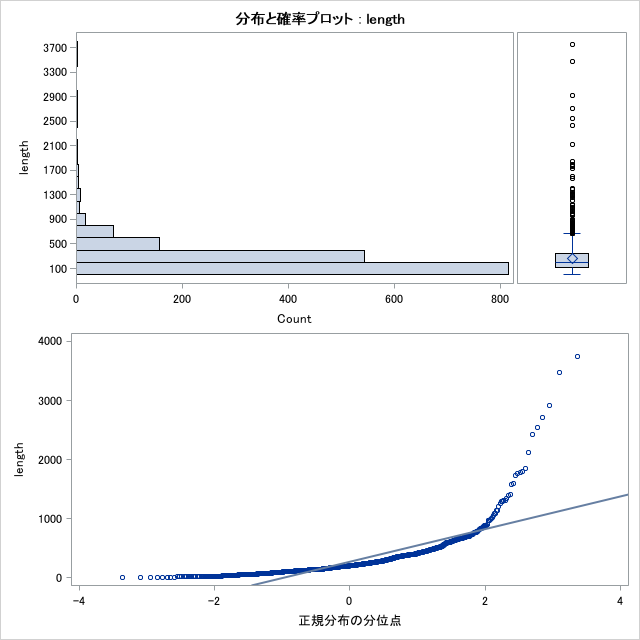

In [19]:
proc univariate data = bike plots;
  var length;
run;

7. 自転車レーンの長さの分布を(a)type、(b)numLanesごとに層別化して、統計量とグラフに表してください。

<!-- 
7\. Describe the distribution of bike lane lengths numerically and graphically after stratifying them by (a) type and then by (b) number of lanes (numLanes). 
-->


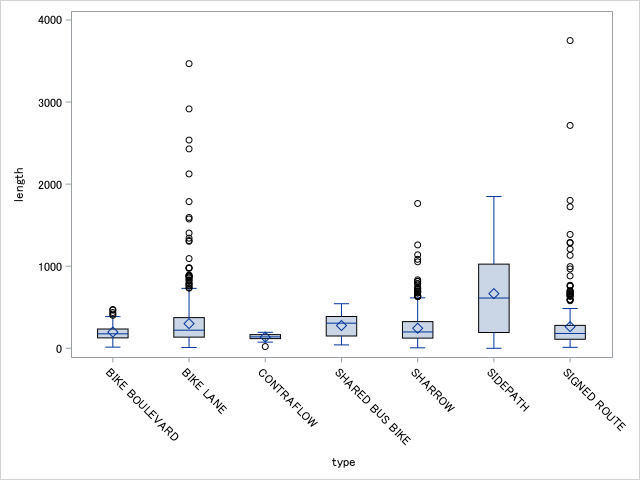
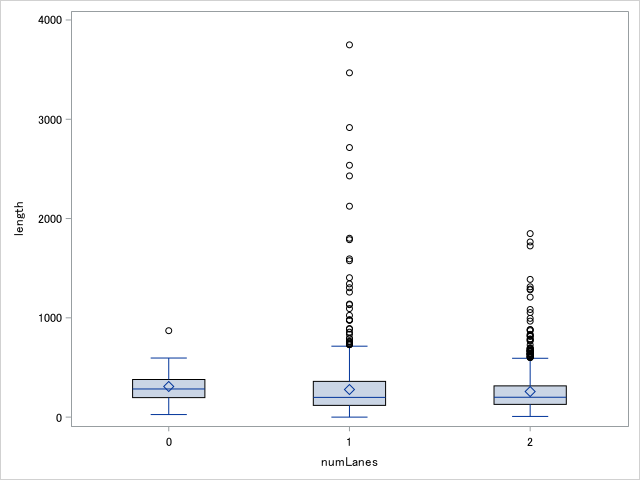

In [20]:
proc means data=bike mean std;
  class type;
  var length;
run;

proc sgplot data = bike;
  vbox length / category = type;
run;

proc means data=bike mean std;
  class numlanes;
  var length;
run;

proc sgplot data = bike;
  vbox length / category = numlanes;
run;

## フォーマットと日付

1. Freqプロシージャを使用して、bike lane 種類別の表を作成してください。

<!-- 
## SAS Formats and Dates 

1\. Use proc freq to make a table of the different bike lane types. 
-->

In [21]:
proc import datafile="/folders/myfolders/SAS_Notes/data/Bike_Lanes.csv"
            out = bike dbms = csv replace;
  getnames = yes;
  guessingrows = max;
run;

proc freq data = bike;
  table type;
run;

2.  bike lane について"SIDEPATH", "BIKE BOULEVARD" と "BIKE LANE"はそのまま、その他は " "とするフォーマットを作成し、Freqプロシージャでフォーマットを使用してbike lane種類別の表を作成してください。表はどのようになりましたか?  

<!-- 
2\. Create a format that changes changes the bike lane types by mapping "SIDEPATH", "BIKE BOULEVARD", and "BIKE LANE" to itself but does not provide a value for the other types. Apply this format to type and make a table of type using PROC FREQ. What happens to the other bike lane types? 
-->

In [22]:
proc format;
   value $typefmt "SIDEPATH" = "SIDEPATH"
                   "BIKE BOULEVARD" = "BIKE BOULEVARD"
                   "BIKE LANE" = "BIKE LANE"
                   OTHER = " ";
run;

data bike2;
  set bike;
  format type $typefmt.;
run;

proc freq data = bike2;
  table type;
run;

"SIDEPATH", "BIKE BOULEVARD" と "BIKE LANE"以外を欠損値にしたため、3つの水準の表となった。

3.  bike lane について"CONTRAFLOW", "SHARED BUS BIKE", "SHARROW", "SIGNED ROUTE"はそのまま、その他は "OTHER"とするフォーマットを作成し、Freqプロシージャでフォーマットを使用してbike lane種類別の表を作成してください。

<!-- 
We have translated all but BIKE BOULEVARD, BIKE LANE, and SIDEPATE to missing, so we only get these three listed as categories in the table. 

3\. Create a format that changes the bike lane types to be "CONTRAFLOW", "SHARED BUS BIKE", "SHARROW", "SIGNED ROUTE", or "OTHER" if the lane type is anything else. 
-->

In [23]:
proc format;
  value $type2fmt "CONTRAFLOW" = "CONTRAFLOW"
                   "SHARED BUS BIKE" = "SHARED BUS BIKE"
                   "SHARROW" = "SHARROW"
                   "SIGNED ROUTE" = "SIGNED ROUTE"
                   "SIDEPATH", "BIKE BOULEVARD", "BIKE LANE" = "OTHER";
run;

data bike3;
  set bike;
  format type $type2fmt.;
run;

proc freq data = bike3;
  table type;
run;

4. 以下の日付3つと時間を含むデータセットを読み込むようなデータステップのコードを作成してください。その後データセットを読めるような日時フォーマットを使用して結果に出力し、正しく読み込めたことを確認してください(SASドキュメントの日時フォーマット・インフォーマットのページを必要に応じ参照してください)。

```    
data temp;
  input date1 /*informat1*/ +1 date2 /*informat2*/ +1
        date3 /*informat3*/ @32 time /*informat4*/;
  datalines;
2014/02/14 06Jan2018 4/5/2016   03:2:22
;
run;
```

<!-- 
4\. Write a datatep that can be used to read in the following small dataset with three dates and one time. Then print the dataset using readable date formats. 

    
    
    

    
DATA temp;
    
  INPUT date1 /*informat1*/ +1 date2 /*informat2*/ +1
    
        date3 /*informat3*/ @32 time /*informat4*/;
    
  DATALINES;
    
2014/02/14 06Jan2018 4/5/2016   03:2:22
    
;
    
RUN;
    

     -->

In [24]:
data temp;
  input date1 yymmdd10. +1 date2 DATE9. +1
        date3 mmddyy8. @32 time time7.;
  datalines;
2014/02/14 06Jan2018 4/5/2016   03:2:22
;
run;

proc print data = temp;
  format date1 date2 date3 mmddyy10. time time7.;
run;

## 文字列関数

1. PROC IMPORTを使ってBaltimore cityの給与データセット Baltimore_City_Employee_Salaries_FY2015.csvを読み込んでください。
<!-- 
## Character Functions 

1\. Read in the Baltimore city employee salaries dataset, Baltimore_City_Employee_Salaries_FY2015.csv, using PROC IMPORT. 
-->

In [25]:
proc import datafile = "/folders/myfolders/SAS_Notes/data/Baltimore_City_Employee_Salaries_FY2015.csv"
            out = sal dbms = csv replace;
  getnames = yes;
  guessingrows = max;
run;

proc print data = sal(obs=5);
run;

2. 一時データセット health_sal を作成し、そこには (大文字小文字を区別せずに) 職名「JobTitle」に "fire" が含まれるもののみを含めでください。  


<!-- 
2\. Make a temporary SAS dataset called `health_sal` using the salaries dataset, with only the agencies (`JobTitle`) of those with "fire" (anywhere in the job title), if any, in the name. Be sure to ignore case in the string matching for 'fire'. 
-->

In [26]:
data health_sal;
  set sal;
  where index(lowcase(JobTitle), 'fire') > 0;
RUN;

proc print data=health_sal(obs=5);
  var JobTitle;
run;

3. 一時データセット trans を作成し、そこには (大文字小文字を区別して) "TRANS" が含まれるもののみを含めてください。
<!-- 
3\. Make a temporary data set called `trans` which contains only agencies that contain “TRANS” (case sensitive). 
-->

In [27]:
data trans;
  set sal;
  where index(JobTitle, 'TRANS') > 0;
run;

proc print data=trans(obs=5);
  var JobTitle;
run;

4. Baltimoreの給与データで、名前に "abra" が含まれる人の職業は何ですか? 大文字小文字は区別しないでください。

<!-- 
4\. What is/are the profession(s) of people who have “abra” in their name for Baltimore’s Salaries? Case should be ignored. 
-->

In [28]:
proc print data=sal;
  var name JobTitle;
  where index(lowcase(name), 'abra') > 0;
run;

5. 警察局、消防局、保安官事務所のみを含む給与データセットのサブセットを作成します。変数「Agency」を使って(大文字小文字を区別した)文字列のマッチングを行ってください。このデータセットemerには何人の従業員が含まれていますか?

<!-- 
5\. Create a subset of the salaries dataset that only includes the Police Department, Fire Department and Sheriff’s Office. Use the Agency variable with (case sensitive) string matching. Call this `emer`. How many employees are in this new dataset? 
-->

In [29]:
data emer;
  set sal;
  where index(agency, "Sheriff's Office") > 0 or
        index(agency, "Police Department") > 0 or
        index(agency, "Fire Department") > 0;
run;

proc print data=emer(obs=5);
  var agency;
run;

6. データセットemer に変数「dept」を作成し、変数「Agency」から 'ment' または 'ice' の手前の部分を抽出してください。例えば、ment または ice までの文字を抜き出し (正規表現ではカッコで囲むとグループ化できます)、その後の文字は削除します。PROC FREQを使って変数「dept」の度数表を作成します。目的の部分文字列を抽出するには、次のようにします。

```
re = prxparse('/.*(ment|ice)/'); 
call prxsubstr(re, Agency, pos, len);
dept = substr(Agency, pos, len);
```

<!-- 
6\. Create a variable called `dept` in the `emer` data set by extracting the the part of the `Agency` variable up until 'ment' or 'ice'. E.g. we want to extract all characters up until ment or ice (we can group in regex using parentheses) and then discard the rest. Use: 

    
    
    
re = prxparse('/.*(ment|ice)/');
    
call prxsubstr(re, Agency, pos, len);
    
dept = substr(Agency, pos, len);
    
 -->

In [30]:
data emer;
  set emer;
  re = prxparse('/.*(ment|ice)/');
  call prxsubstr(re, Agency, pos, len);
  dept = substr(Agency, pos, len);
run;

proc freq data = emer;
  table dept;
run;

## データクリーニング

1. PROC IMPORTを使ってBike_Lanes.csvをデータセットbikeとして読み込んでください。

<!-- 
## Data Cleaning 

1\. Read in the bike lanes dataset Bike_Lanes.csv using PROC IMPORT and call it bike. 
-->

In [31]:
proc import datafile="/folders/myfolders/SAS_Notes/data/Bike_Lanes.csv"
            out = bike dbms = csv replace;
  getnames = yes;
  guessingrows = max;
run;

proc print data = bike(obs=5);
run;

2. データセットbikeには何行あり、そのうち完全ケースは何行ありますか? ヒント: cmiss(of \_ALL\_)を使ってデータセットにおいて0/1の変数を作り、その0/1変数をPROC MEANSで合計することで完全ケースの数がわかります。 

<!-- 
2\. How many rows are are in the bike dataset? How many are complete cases? Hint: Use cmiss(of _ALL_) in a dataset to create a 0/1 variable to indicate if it complete or not and then use PROC MEANS to sum this 0/1 variable. 
-->

In [32]:
proc contents data = bike;
run;

データセットbikeは1631行です。

<!-- 
There are 1631 rows in the bike data set. 
-->

In [33]:
data bike;
  set bike;
  if cmiss(of _all_) > 0 then complete = 0;
  else complete = 1;
run;

proc print data = bike(obs=5);
run;

proc means data = bike sum;
  var complete;
run;

3. 変数「route」が欠損していない行のみを抽出して一時データセットhave_routeを作成します。そして、PROC FREQを使って変数「subType」の度数表(欠損値を含む)を作成してください。  

<!-- 
3\. Filter rows of bike that are NOT missing the `route` variable, assign this to the object `have_route`. Create a frequency table of the `subType` variable using PROC FREQ, including the missing `subType`s. 
-->

In [34]:
data have_route;
  set bike;
  where not missing(route);
run;

proc freq data = have_route;
  table subType / missing;
run;

## データ操作

1. Bike_Lanes_Wide.csvデータセットをPROC IMPORTでデータセット`wide`として読み込み、最初の数行を出力してください。

<!-- 
## Data Manipulation 

1\. Read in the Bike_Lanes_Wide.csv dataset and call is `wide` using PROC IMPORT. Print the first few rows of the dataset. 
-->

In [1]:
proc import datafile="/folders/myfolders/SAS_Notes/data/Bike_Lanes_Wide.csv"
            out = wide dbms = csv replace;
  getnames = yes;
  guessingrows = max;
run;

proc contents data = wide;
run;

proc print data = wide(obs=5);
run;

2. データセット`wide`をPROC TRANSPOSEまたはデータステップを使って縦持ち形式に変形してください。「name」以外のすべての列を対象にする必要があります。新しい2つの列「lanetype」(元の列名)と「the_length」(データ値)を持つ縦持ちのデータセットに変換します。変数「the_length」の'NA'の値は.に置き換え、数値型に変換します。

<!-- 
2\. Reshape `wide` using either PROC TRANSPOSE or a DATA step. You will need to gather all columns except the name column. Transform into a long dataset with two new columns `lanetype` (the former column names) and `the_length` the data values. In the variable `the_length`, replace 'NA' values with . and convert it to a numeric column. 
-->

In [2]:
data long;
  set wide;
  array col{*} 'BIKE BOULEVARD'n -- NA;
  do i = 1 to dim(col);
    lanetype = vname(col[i]);
    if col[i] = 'NA' then the_length = .;
    else the_length = input(col[i], 20.7);
    output;
  end;
  drop 'BIKE BOULEVARD'n -- NA i;
run;

title 'Using a DATA step';
proc print data = long(obs=10);
run;

proc sort data=wide;
  by name;
run;

proc transpose data = wide
               out = long2 (rename = (col1 = the_length 
                                      _name_ = lanetype));
  by name;
  var 'BIKE BOULEVARD'n -- NA;
run;

data long2;
   set long2(rename = (the_length = length));
   if length = 'NA' then the_length = .;
   else the_length = input(length, 20.7);
   drop length;
run;

title 'Using PROC TRANSPOSE';
proc print data = long2(obs=10);
run;

title;

3. roads.csvとcrashes.csvファイルをデータセット`road`と`crash`として読み込みんでください。

<!-- 
3\. Read in the roads and crashes .csv files and call them `road` and `crash`.
-->

In [3]:
proc import datafile="/folders/myfolders/SAS_Notes/data/roads.csv"
            out = road dbms = csv replace;
  getnames = yes;
  guessingrows = max;
run;

proc import datafile="/folders/myfolders/SAS_Notes/data/crashes.csv"
            out = crash dbms = csv replace;
  getnames = yes;
  guessingrows = max;
run;

proc print data = road;
run;

proc print data = crash(obs=10);
run;

4. データセット`crash`の変数「Road」にあるハイフン(`-`)をすべて空白に置き換え（`tranwrd`を使用）、データセット`crash2`とします。変数「Road」をPROC FREQにより度数表を作成してください。

<!-- 
4\. Replace (using `tranwrd`) any hyphens (`-`) with a space in `Road` variable of `crash`. Call this data `crash2`. Table the `Road` variable with PROC FREQ. 
-->

In [4]:
data crash2;
  set crash;
  road = tranwrd(road, '-', ' ');
run;

proc freq data = crash2;
  table road;
run;

5. データセット`crash`と`road`のそれぞれに何件のオブザベーションがありますか?

<!-- 
5\. How many observations are in each of the `crash` and `road` datasets? 
-->

In [5]:
proc contents data = crash;
run;

proc contents data = road;
run;

crash: 110オブザベーション、road: 5オブザベーション 

6. `crash2`の「Road」`scan`を使って(「type」と「number」)に分割します。この結果を再び`crash2`に割り当てます。`crash2`の「type」をPROC FREQで度数表を作成してください。次に、連結関数(CATなど)を使って新しい変数「road_hyphen」を作成します。「type」と「number」の列をハイフン(`-`)で結合し、「road_hyphen」をPROC FREQで度数表を作成してください。

<!-- 
The crash dataset has 110 observations and the road datset has 5. 

6\. Separate the `Road` column (using `scan`) into (`type` and `number`) in `crash2`. Reassign this to `crash2`. Table `type` from `crash2` using PROC FREQ. Then create a new variable calling it `road_hyphen` using one of the concatenate functions (such as CAT). Unite the `type` and `number` columns using a hyphen (`-`) and then table `road_hyphen` using PROC FREQ. 
-->

In [6]:
data crash2;
  set crash2;
  type = scan(road, 1);
  number = scan(road, 2);
run;

proc freq data=crash2;
  table type;
run;

data crash2;
  set crash2;
  road_hyphen = catx('-', type, number);
run;

proc freq data=crash2;
  table road_hyphen;
run;


7. `crash`データセットでは、どの年のデータが収集されましたか?何年分ありますか?

<!-- 
7\. Which and how many years were data collected in the `crash` dataset? 
-->

In [7]:
proc freq data=crash;
  table year;
run;

データセットcrashに含まれているのは1991-2012の22年分

8. Bike_Lanes.csvをデータセット`bike`として読み込んでください。


<!-- 
The crash dataset contains data on the years from 1991 to 2012 for a total of 22 years. 

8\. Read in the dataset Bike_Lanes.csv and call it `bike`. 
-->

In [8]:
proc import datafile="/folders/myfolders/SAS_Notes/data/Bike_Lanes.csv"
            out = bike dbms = csv replace;
  getnames = yes;
  guessingrows = max;
run;

proc print data=bike(obs=5);
run;

9. 「type」と「name」に欠損値がない行のみを残し、出力を`bike`に再度割り当ててください。

<!-- 
9\. Keep rows where the record is not missing `type` and not missing `name` and re-assign the output to `bike`. 
-->

In [9]:
data bike;
  set bike;
  where not missing(type);
run;

proc print data=bike(obs=5);
run;

10. PROC MEANSでBYステートメントを使い、「name」と「type」でグループ化(各nameごとのtypeごとの意味)し、「length」の合計を求めてください。OUTPUTステートメントを使ってこの要約データセットを出力し、「name」、「type」と合計した「length」(これを`length`に名前を変更)のみを保持し、データセット`sub`としてください。

<!-- 
10\. Using PROC MEANS with a BY statement grouping `name` and `type` (i.e for each type within each name), find the `sum` of the `length`. Use an OUTPUT statement to get this summary dataset and only keep the `name`, `type` and sum of the `length` column (after renaming this column `length`). Call this data set `sub`. 
-->

In [10]:
proc sort data = bike;
  by name type;
run;

proc means data = bike noprint;
  by name type;
  output out=sub sum=length;
run;

data sub;
  set sub;
  keep name type length;
run;

proc print data=sub(obs=8);
run;

In [11]:
proc freq data=sub;
  table type;
run;

11. `sub`を縦持ちの形式から「type」を変数名、「length」を値とした横持ちの形式に変換してください。(注: 「name」にはスペースが含まれます。変数名にする前にスペースを置き換える必要はあるでしょうか? データステップによる方法はすべての「name」が同じ「type」の値を持っていないことから、難しくなっています。)

<!-- 
11\. Reshape `sub` from long to wide by taking the `type` to be the new columns and `length` to be the value in those columns. (NOTE: the `names` have spaces in them. Do we need to replace the spaces with a character before changing them to column names?) 
-->

In [12]:
data new_wide;
  set sub;
  by name;
  retain BIKE_BOULEVARD BIKE_LANE CONTRAFLOW SHARED_BUS_BIKE 
         SHARROW SIDEPATH SIGNED_ROUTE;
  array atype [*] BIKE_BOULEVARD BIKE_LANE CONTRAFLOW SHARED_BUS_BIKE 
                  SHARROW SIDEPATH SIGNED_ROUTE;
                  
  if first.name then call missing(of atype(*));
  
  if type = 'BIKE BOULEVARD' then atype[1] = length;
  else if type = 'BIKE LANE' then atype[2] = length;
  else if type = 'CONTRAFLOW' then atype[3] = length;
  else if type = 'SHARED BUS BIKE' then atype[4] = length;
  else if type = 'SHARROW' then atype[5] = length;
  else if type = 'SIDEPATH' then atype[6] = length;
  else if type = 'SIGNED ROUTE' then atype[7] = length;
  
  if last.name then output;
  drop type length;
run;

title 'Wide Dataset Using DATA Step';
proc print data=new_wide(obs=5);   
run;

proc transpose data = sub out = new_wide2(drop=_name_);
  by name;
  var length;
  id type;
run;

title 'Wide Dataset Using PROC TRANSPOSE';
proc print data = new_wide2(obs=5);   
run;

title ;

12. データセット`crash`と`road`を「Road」をキーとして結合し完全ケースだけを含むようにして(内部結合を使用)、名前を`merged`としてください。いくつのオブザベーションが含まれますか?

<!-- 
12\. Join data in the crash and road datasets to retain only complete data, (using an inner join on road) Merge by the variable `Road`. Call the output merged. How many observations are there? 
-->

In [13]:
proc sort data = road;
  by road;
run;

proc sort data = crash;
  by road;
run;

data merged;
  merge road (in = in1) 
        crash (in = in2);
  by road;
  if in1 = 1 and in2 = 1;
run;

proc contents data = merged;
run;

88オブザベーション

13. 外部結合により結合して、名前は`full_join`としてください。 いくつのオブザベーションが含まれますか?

<!-- 
There are 88 rows. 

13\. Join data using a `full_join`. Call the output `full`. How many observations are there? 
-->

In [14]:
data full_join;
  merge road crash;
  by road;
run;

proc print data = full_join(obs=10);
run;

115 オブザベーション

14. `road`と`crash`を左結合により結合してください。ここでは順番が重要になります。いくつのオブザベーションが含まれますか?

<!-- 
14\. Do a left join of the `road` and `crash`. ORDER matters here! How many observations are there? 
-->

In [15]:
data left_join;
  merge road (in = in1) crash;
  by road;
  if in1 = 1;
run;

proc contents data = left_join;
run;

89オブザベーション

15. 上記を右結合により結合してください。いくつのオブザベーションが含まれますか?

<!-- 
There are 89 rows. 

15\. Repeat above with a `right_join` with the same order of the arguments. How many observations are there? 
-->

In [16]:
data right_join;
  merge road crash (in = in1);
  by road;
  if in1 = 1;
run;

proc contents data = right_join;
run;

110オブザベーション

<!-- 
There are 110 observations in the right joined dataset. 
-->

## Output Delivery System(ODS)とグラフ

<!-- 
## The Output Delivery System and Graphics
-->

In [1]:
proc import datafile = "/folders/myfolders/SAS_Notes/data/Charm_City_Circulator_Ridership.csv"
            out = circ dbms = csv replace;
  getnames = yes;
  guessingrows = max;
run;

data long;
  set circ;
  array larray[*] orangeBoardings -- bannerAverage;
  do i = 1 to dim(larray);
    var = vname(larray[i]);
    number = larray[i];
    var = tranwrd(var, 'Board', ' Board');
    var = tranwrd(var, 'Alight', ' Alight');
    var = tranwrd(var, 'Average', ' Average');
    route = scan(var, 1);
    type = scan(var, 2);
    output;
  end;
   
  drop i var orangeBoardings -- bannerAverage;
run;

data avg;
  set long;
  where type = 'Average' and number ^= .;
run;

proc print data = long(obs = 10);
run;

proc print data = avg(obs=10);
run;

1. データセットavgから日付ごとの平均乗客数の散布図を作成してください。
    a. ポイントの色をルート（オレンジ、パープル、グリーン、バナー）で色分けしてください。ここではデフォルトの色で構いません。
    b. 各ルートに対して黒い滑らかな曲線（LOESS）を追加してください。
    c. ポイントの色を曜日ごとにしてください。
<!-- 
1\. Plot average ridership (avg data set) by date using a scatterplot. 
a. Color the points by route (orange, purple, green, banner) 
b. Add black smoothed curves for each route 
c. Color the points by day of the week 
-->


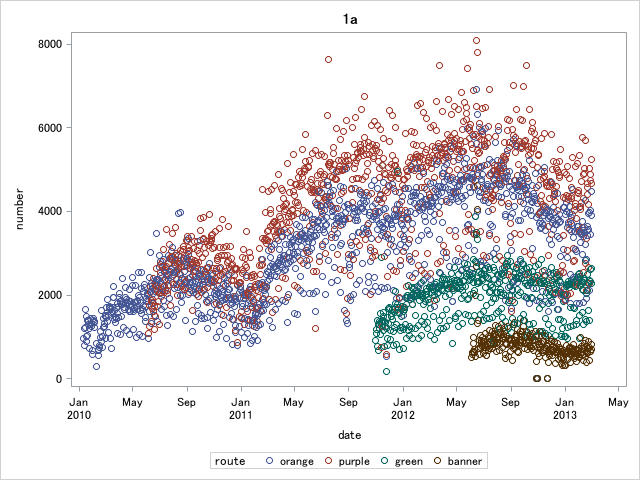
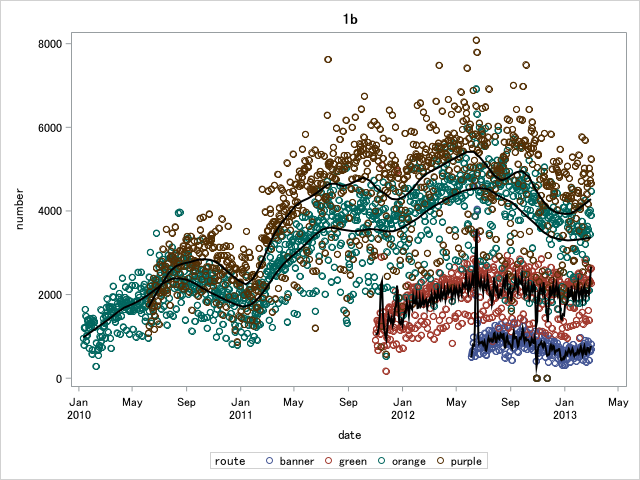
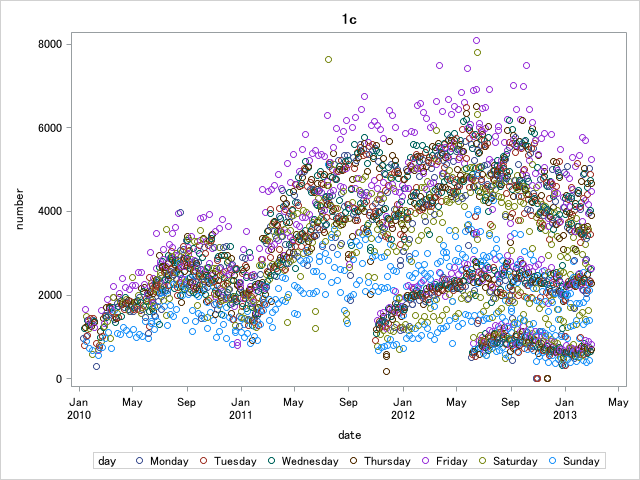

In [2]:
title '1a';
proc sgplot data = avg; 
  scatter y = number x = date / group = route;
run;

title '1b';
proc sgplot data = avg;   
  scatter y = number x = date / group = route;
  loess y = number x = date / group = route lineattrs=(color = black);
run;

title '1c';
proc sgplot data = avg;   
  scatter y = number x = date / group = day;
run;

2. ポイントの色がルートの名前（バナー→青）である1aを再プロットしてください。注：属性マッピングデータを作成する必要があります。

<!-- 
2\. Replot 1a where the colors of the points are the name of the route (with banner –> blue). Note: you will need to make a data attribute map. 
-->


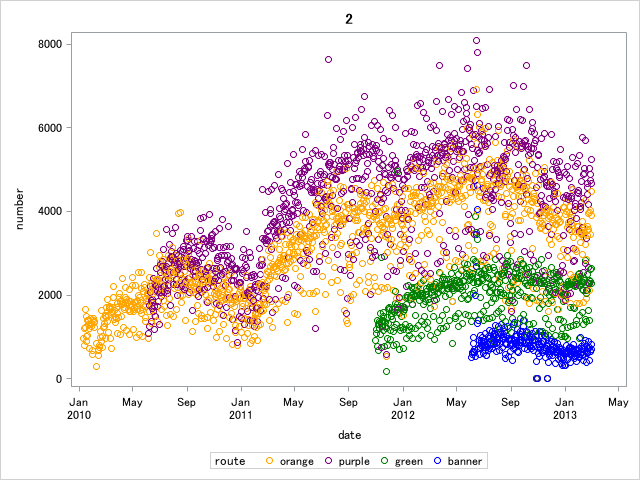

In [3]:
data marker_map;
  input id $2. +1 VALUE $6. +1 MARKERCOLOR $6.;
  datalines;
mc banner blue
mc green  green
mc orange orange
mc purple purple
;
run;

title '2';
proc sgplot data = avg dattrmap = marker_map;   
  scatter y = number x = date / group = route attrid = mc;
run;

3. ルートごとにパネルを1つずつ持つ、日付ごとの平均乗客数の散布図を作成してください。

<!-- 
3\. Plot a scatterplot of average ridership by date with one panel per route. 
-->


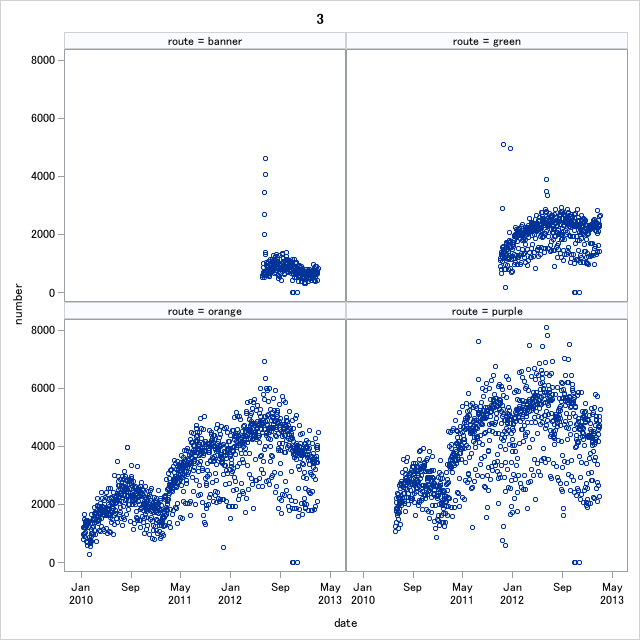

In [4]:
title '3';
proc sgpanel data = avg;   
  panelby route;
  scatter y = number x = date;
run;

4. 曜日ごとに別々のパネルを持ち、ルートで色分けされた、日付ごとの平均乗客数の散布図を作成してください。

<!-- 
4\. Plot a scatterplpot of average ridership by date with separate panels by day of the week, colored by route. 
-->


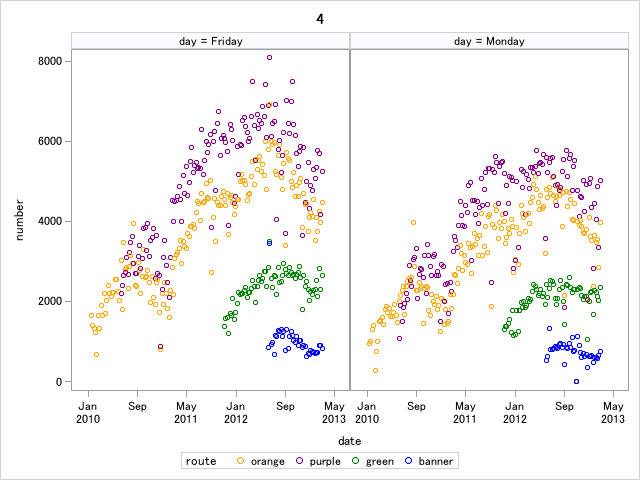
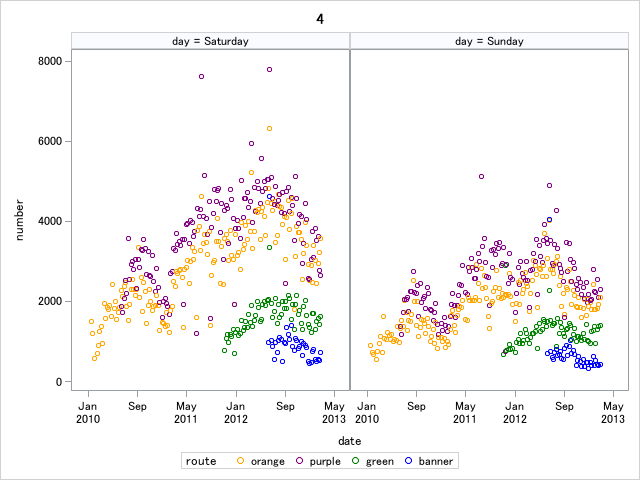
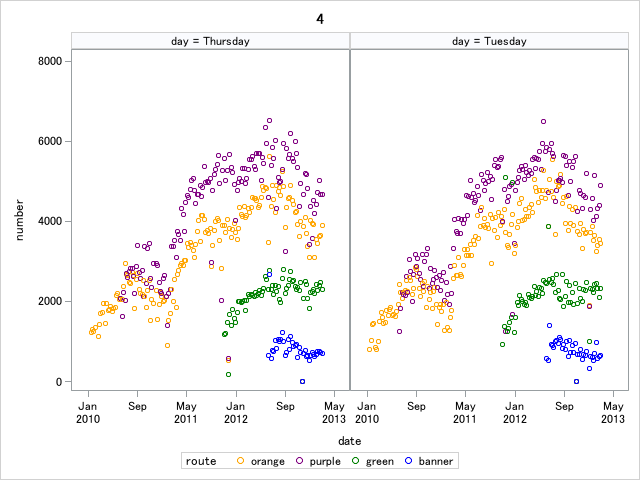
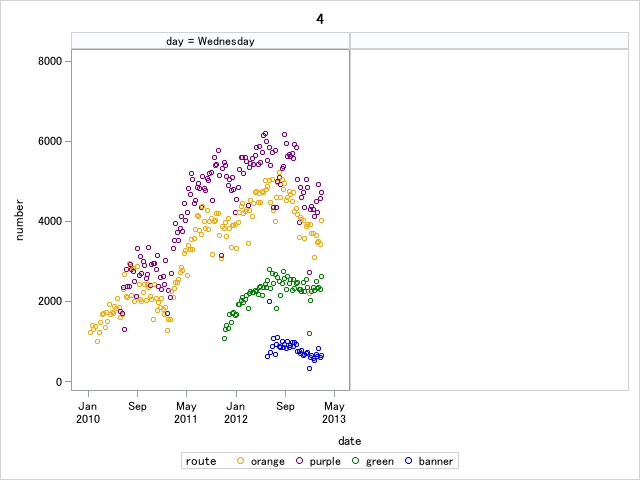

In [5]:
*Default colors are fine here to, but we can also use a data attribute map like we did before;
title '4';
proc sgpanel data = avg dattrmap = marker_map;   
  panelby day;
  scatter y = number x = date / group = route attrid = mc;
run;

5. ルートで色分けされた（1aと同じ）、日付ごとの平均乗客数（avg）の散布図を作成してください。（平均を算出はせず、各ルートの平均の列を使用します）。x軸のラベルを"Year"、y軸のラベルを"Number of People"にします。

<!-- 
5\. Plot a scatterplot of average ridership (avg) by date, colored by route (same as 1a). (do not take an average, use the average column for each route). Make the x-label "Year". Make the y-label "Number of People". 
-->


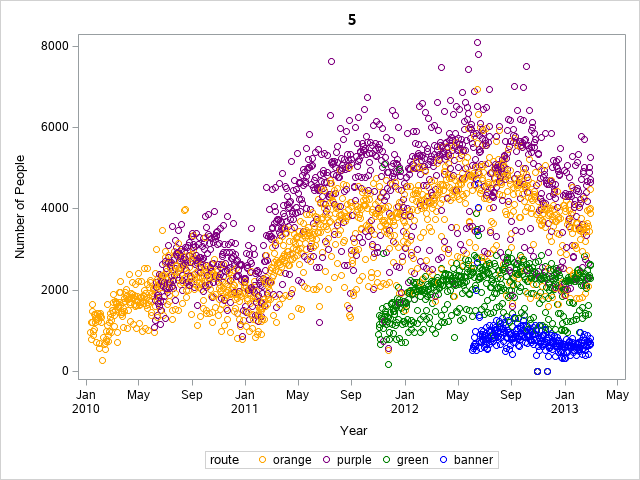

In [166]:
title '5';
proc sgplot data = avg dattrmap = marker_map;   
  scatter y = number x = date / group = route attrid = mc;
  xaxis label = "Year";
  yaxis label = "Number of People";
run;

6. オレンジルートの日付に対する平均乗客数の線グラフを作成し、乗車数(boardings)と降車数(alightings)も誤差線として破線にして追加してください。線の色はオレンジにします。

<!-- 
6\. Plot average ridership on the orange route versus date as a solid line, and add dashed “error” lines based on the boardings and alightings. The line colors should be orange. 
-->


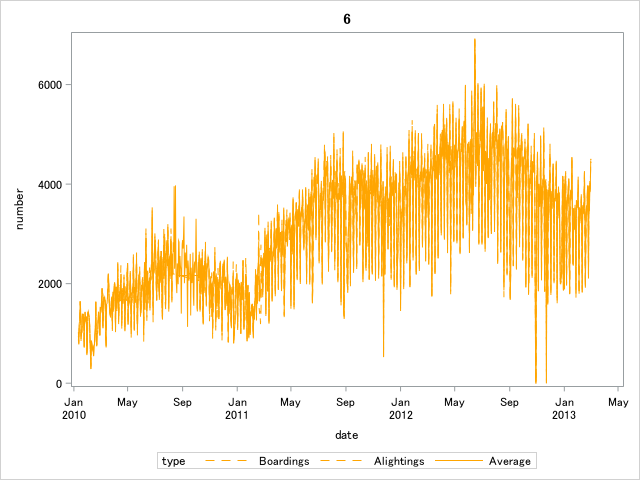

In [6]:
data orange;
  set long;
  where route = "orange";
run;

data line_map;
  input id $2. +1 VALUE $10. +1 linepattern $5.;
  datalines;
lp Alightings dash
lp Average    solid
lp Boardings  dash
;
run;

title '6';
proc sgplot data = orange dattrmap = line_map;  
  series y = number x = date / group = type attrid = lp lineattrs=(color = orange);
run;

title;

## SASによる統計解析
<!-- 
## Statistical Analysis in SAS 
-->

In [ ]:
filename cardata '/folders/myfolders/SAS_Notes/data/kaggleCarAuction.csv';

proc import datafile = cardata out = cars dbms = csv replace;
  getnames = yes;
  guessingrows = 1000;
run;

filename mortdat '/folders/myfolders/SAS_Notes/data/indicatordeadkids35.csv';

proc import datafile = mortdat out = mort dbms = csv replace;
  getnames = yes;
  guessingrows = 500;
run;

1. 1980年、1990年、2000年、2010年の死亡率データ間の相関関係を計算します。結果を画面に表示するだけで十分です。次に、NOMMISS オプションを使用して計算します。(注意: 列名は数値ですが、SASの標準的な名前としては無効なので、コード内で 1980 年の変数を指すには '1980'n を使用します)

<!-- 
1\. Compute the correlation between the `1980`, `1990`, `2000`, and `2010` mortality data. Just display the result to the screen. Then compute using the NOMMISS option. (Note: The column names are numbers, which are invalid standard SAS names, so to refer to the variable 1980 in your code use '1980'n.) 
-->

In [2]:
proc corr data = mort;
  var '1980'n '1990'n '2000'n '2010'n;
run;

proc corr data = mort nomiss;
  var '1980'n '1990'n '2000'n '2010'n;
run;

2. 
   a. ミャンマー、中国、およびアメリカの死亡率データ間の相関関係を計算します。この相関行列をODS OUTPUT を使用してデータセット country_corに出力します。
   b. ミャンマーとアメリカの相関関係を相関行列から抽出します。
<!-- 
2\. 
a. Compute the correlation between the `Myanmar`, `China`, and `United States` mortality data. Store this correlation matrix in an object called `country_cor` using ODS OUTPUT. 
b. Extract the Myanmar-US correlation from the correlation matrix. 
-->

In [3]:
data mort_sub;
  set mort(rename=(Var1 = Country));
  where country in ('Myanmar' 'China' 'United States');
run;

proc transpose data = mort_sub out = mort_sub_transposed;
  var '1760'n -- '2099'n;
  id country;
run;

ods output PearsonCorr = country_cor;
proc corr data = mort_sub_transposed;
  var China Myanmar 'United States'n;   
run;

proc print data = country_cor;
  var Myanmar;
  where Variable = 'United States';
run;

3. 1990年と2000年の死亡率情報間に差があるかどうかを、対応のある t 検定とウィルコクソン符号順位検定で調べてください。ヒント: 1990年の情報列を取り出すには '1990'n を使用します。

<!-- 
3\. Is there a difference between mortality information from `1990` and `2000`? Run a paired t-test and a Wilcoxon signed rank test to assess this. Hint: to extract the column of information for `1990`, use '1990'n. 
-->


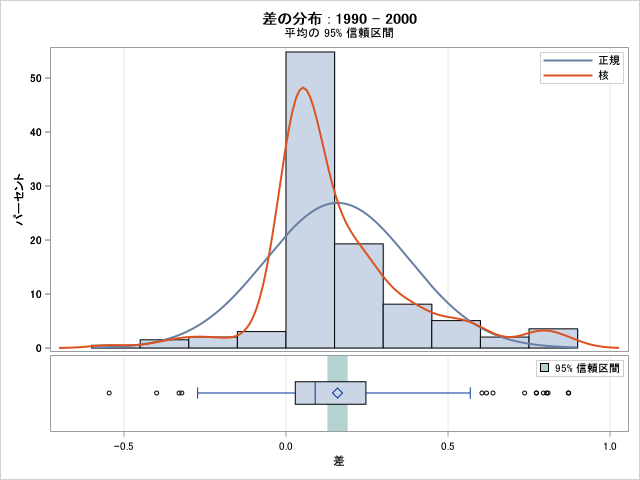
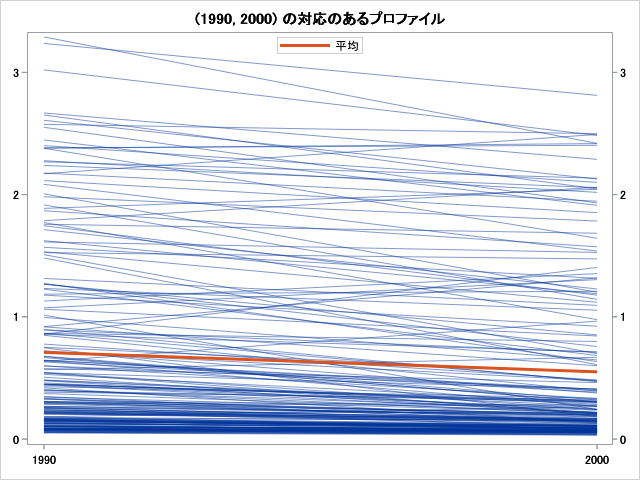
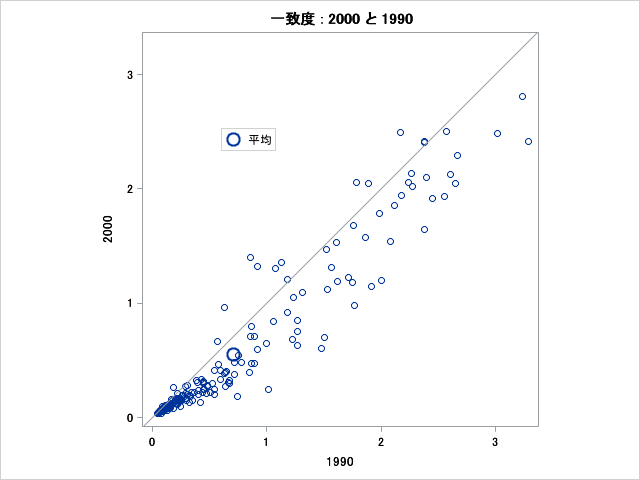
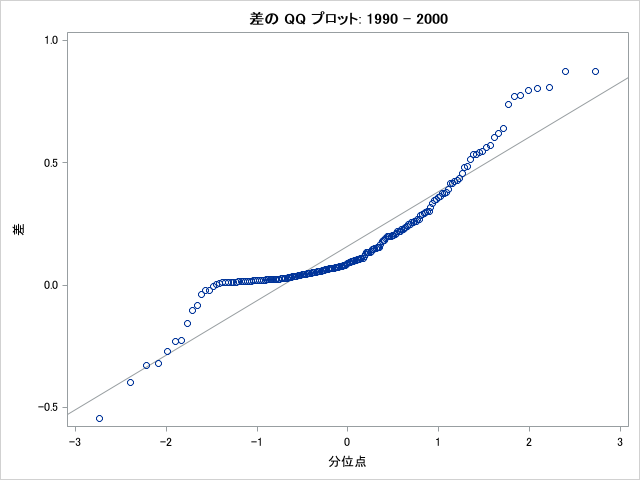

In [4]:
proc ttest data = mort;
  paired '1990'n*'2000'n;
run;

data diff;
  set mort;
  diff = '2000'n - '1990'n;
run;

proc univariate data = diff;
  var diff;
run;

4. データセット carsを使用して、車両価格「VehBCost」 を従属変数とし、車両年齢「VehicleAge」とオンライン販売 「IsOnlineSale」の有無とその相互作用を予測変数とする線形回帰モデルを使用します。

<!-- 
4\. Using the cars dataset, fit a linear regression model with vehicle cost (`VehBCost`) as the outcome and vehicle age (`VehicleAge`) and whether it's an online sale (`IsOnlineSale`) as predictors as well as their interaction. 
-->

In [5]:
proc glm data = cars;
  model VehBCost = VehicleAge IsOnlineSale VehicleAge*IsOnlineSale;
run;

5. データセットcars内に車両価格が 10,000 ドルを超えていることを示す変数「expensive」を作成してください。カイ二乗検定により車が高価だったことと、損な取引だったことを示すラベル用変数「IsBadbuy」に関連があるかを評価してください。
<!-- 
5\. Create a variable called `expensive` in the `cars` data that indicates if the 
vehicle cost is over `$10,000`. Use a chi-squared test to assess if there is a 
relationship between a car being expensive and it being labeled as a "bad buy" (`IsBadBuy`). 
-->

In [6]:
data cars;
  set cars;
  if VehBCost > 10000 then expensive = 1;
  else expensive = 0;
run;

proc freq data = cars;
  tables expensive*IsBadBuy / chisq;
run;

6. ロジスティック回帰を使用し、 応答変数を「IsBadbuy」予測変数を「expensive」「VehicleAge」としてオッズ比の信頼区間を算出してください。

<!-- 
6\. Fit a logistic regression model where the outcome is "bad buy" status and predictors are the `expensive` status and vehicle age (`VehicleAge`). Request confidence intervals for the odds ratios. 
-->


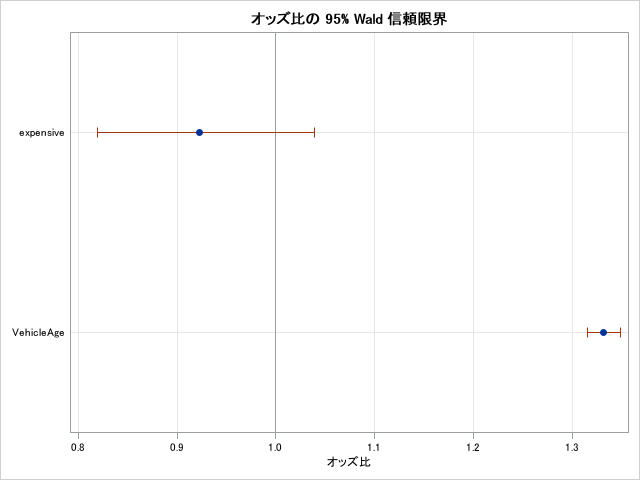

In [7]:
proc logistic data = cars;
  model IsBadBuy(event='1') = expensive VehicleAge / clodds = wald;
run;

## SAS MACRO プログラミング

1. 量的変数の値を以下のように4つのカテゴリーに分割するマクロを書いてください。:

    * X < Q1の場合、group = 1
    * Q1 < X < Medianの場合、group = 2  
    * Median < X < Q3の場合、group = 3
    * Q3 < Xの場合、group = 4

このマクロの定義は次のようになります。%quartilesmacro(mydata, qvar, round, out);

* mydata: 量的変数を含むデータセット
* qvar: 量的変数の名前
* round: 小数点以下の桁数
* out: 出力データセット名。この中にカテゴリ化された変数「qvar_cat」が含まれます。例えば、「qvar」が"bmi"の場合、出力変数は「bmi_cat」になります。

例としてデータセットFraminghamを使用してマクロを検証します。

<!-- 
## Macros 

1\. Write a macro that discretizes a quantitative variable into four categories based on quantiles. That is: 

* if X < Q1 then group = 1 
* if Q1 < X < M then group = 2 
* if M < X < Q3 then group = 3 
* if Q3 < X then group = 4 

The macro should have the following defnition - %quartilesmacro(mydata, qvar, round, out); 

* mydata: dataset containing the quantitative variable 
* qvar: name of quantitative variable 
* round: integer representing number of decimal places to round to 
* out: name of output dataset which contains the categorized variable 

We will explore this by using the Framingham dataset as an example to apply the macro to. 
-->

In [ ]:
libname phc6089 "/folders/myfolders/SAS_Notes/data/";

*Create a temporary data set, so that we don't save changes to the original data set.;
data fghmtemp;
  set phc6089.fghm113;
run;

/*Now let's code some variables with some more descriptive values.
  SEX (Gender): 1=Men 
				2=Women
  Period (Examination cycle): 1=Period1 
							  2=Period2
							  3=Period3
  BPMEDS (Use of anti-hypertensive meds): 0=Not currently
										  1=Currently use
  CURSMOKE (Currently smoke?): 0=No
							   1=Yes
  DIABETES: 0=Not diabetic
			1=Diabetic
  PREVAP (Have angina pectoric?): 0=No
								  1=Yes
  PREVCHD (Coronary heart disease?): 0=No
									 1=Yes
  PREVMI (Myocardial infarction?): 0=No
								   1=Yes
  PREVSTRK (Had a stroke?): 0=No
				   			1=Yes
  PREVHYP (Hypertensive? sys bp >=140 or dyas bp >= 90): 0=no
														 1=yes
*/

proc format;
  value YNfmt 0="No"
  			1="Yes";
  value perfmt 1="Period 1"
  			 2="Period 2"
  			 3="Period 3";
  value gndrfmt 1="Men"
  			  2="Women";
run;

data fghmtemp;
  set fghmtemp;
  format prevap ynfmt.
  	   diabetes ynfmt.
  	   cursmoke ynfmt.
  	   bpmeds ynfmt.
  	   prevchd ynfmt.
  	   prevmi ynfmt.
  	   prevstrk ynfmt.
  	   prevhyp ynfmt.
  	   sex gndrfmt.;
run;

In [4]:
* Step 1 - write code with only macros variables - Let's categorize BMI by quartiles;

%let qvar = bmi;

* Find table name;
ods trace on;
proc means data = fghmtemp Q1 Median Q3;
  var &qvar.;
run;
ods trace off;

ods output summary = quartiles;
proc means data = fghmtemp Q1 Median Q3;
  var &qvar.;
run;

* See the contents of the ODS table;
proc print data = quartiles;
run;

data _null_;
  set quartiles;
  call symputx("Q1", strip(&qvar._Q1));
  call symputx("M", strip(&qvar._Median));
  call symputx("Q3", strip(&qvar._Q3));
run;

%put _user_; * see the value of our macro variables in the log file;

data fghmtemp;
  set fghmtemp;
  if not missing(&qvar.) and &qvar. < &Q1. then &qvar._cat = 1;
  else if &qvar. < &M. then &qvar._cat = 2;
  else if &qvar. < &Q3. then &qvar._cat = 3;
  else &qvar._cat = 4;
run;

proc freq data = fghmtemp;
  tables &qvar._cat;
run;

基礎となるコードは動作しました。これをマクロにしましょう。

<!-- 
Now that we have the basic code working, let's turn this into a MACRO. 
-->

In [5]:

%macro quartilesmacro(mydata, qvar, round, out = out_dat);

ods select none;
ods output summary = quartiles;
proc means data = &mydata. Q1 Median Q3 maxdec = &round.;
  var &qvar.; 
run;
ods select all;

data _null_;
  set quartiles;
  call symputx("Q1", strip(&qvar._Q1));
  call symputx("M", strip(&qvar._Median));
  call symputx("Q3", strip(&qvar._Q3));
run;

data &out.;
  set &mydata.;
  if not missing(&qvar.) and &qvar. < &Q1. then &qvar._cat = 1;
  else if &qvar. < &M. then &qvar._cat = 2;
  else if &qvar. < &Q3. then &qvar._cat = 3;
  else &qvar._cat = 4;
run;

%mend;

%quartilesmacro(fghmtemp, bmi, round = 2, out = out_bmi);

proc freq data = out_bmi;
  tables bmi_cat;
run;

## SASによるシミュレーション

1. この例では、母比率の標本分布を扱います。  
    a) n = 1、p = 0.3の二項分布からサイズ50の500個のサンプルを生成してください。これを行うために、この二項分布からのランダム変量で埋められた500行50列のデータセットを生成します。ヒント：配列とネストされたDOループを使用します。  
    b) mean(of )を使用して、これら500行の各行の平均を計算し、この平均を新しい列として保存してください。  
    c) part bで計算された500個の平均のヒストグラムをプロットし、part bで計算された500個の平均からの平均と標準偏差を計算するためにPROC MEANSを使用してください。これは、サンプルサイズが30のときに成功確率p = 0.3の母集団分布を持つ場合のp-hatの標本分布を表しています。  

<!-- 
## Simulations 

1\. In this example, we will explore the sampling distribution of a sample proportion. 
a) Generate 500 sample of size 50 from a Binomial distribution with n = 1 and p = 0.3. Do this by generating a dataset with 500 rows and 50 columns all filled with random variates from this binomial distribution. Hint: Use an array and a nested DO loop. 
b) Calculate the mean of each of these 500 rows using mean(of ) in a DATA step. Save this mean as a new column. 
c) Plot a histogram of the 500 means calculated in part b and use PROC MEANS to calculate the MEAN and standard deviation of the 500 means calculated in part b. This describes the sampling distribution of p-hat when the population distiribution has probability of success p = 0.3 when the sample size is 30. 
-->


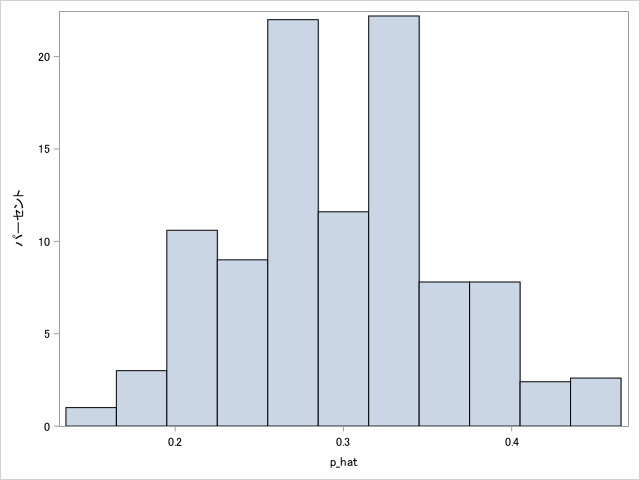

In [1]:
data sim;
  array data[*] x1-x50;
  do numsim = 1 to 500;
     do n = 1 to 50;
        data[n] = ranbin(1234, 1, 0.3);
     end;
     p_hat = mean(of x1-x50);
     output;
  end;
run;

proc sgplot data = sim;
  histogram p_hat;
run;

proc means data = sim mean std;
  var p_hat;
run;